In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ssp126 = xr.open_dataset('/Volumes/LaCie/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp126/r1i1p1f1/Lmon/smb/bisicles-8km/v20210211/smb_Lmon_CESM2-WACCM_ssp126_r1i1p1f1_bisicles-8km_2015-2299.nc')
ssp585 = xr.open_dataset('/Volumes/LaCie/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp585/r1i1p1f1/Lmon/smb/bisicles-8km/v20200702/smb_Lmon_CESM2-WACCM_ssp585_r1i1p1f1_bisicles-8km_2015-2299.nc')
ssp534 = xr.open_dataset('/Volumes/LaCie/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp534-over/r1i1p1f1/Lmon/smb/bisicles-8km/v20200701/smb_Lmon_CESM2-WACCM_ssp534-over_r1i1p1f1_bisicles-8km_2040-2299.nc')

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [3]:
ts126 = ssp126.smb.mean(dim=['x', 'y'])
ts585 = ssp585.smb.mean(dim=['x', 'y'])
ts534 = ssp534.smb.mean(dim=['x', 'y'])

(-0.4, 0.5)

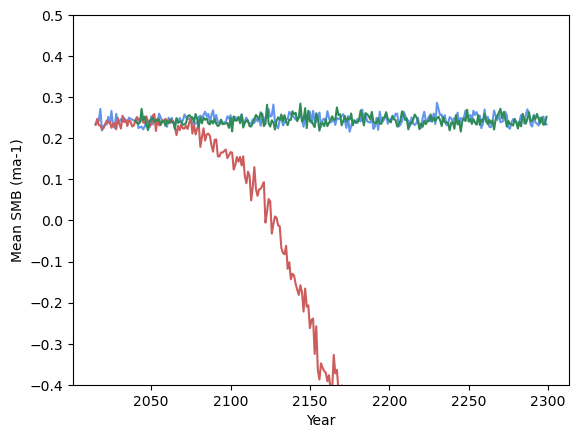

In [35]:
plt.plot(ts126.time, ts126, label='ssp126', color='cornflowerblue')
plt.plot(ts585.time, ts585, label='ssp585', color='indianred')
plt.plot(ts534.time, ts534, label='ssp534-over', color='seagreen')
plt.xlabel('Year')
plt.ylabel('Mean SMB (ma-1)')
plt.ylim(-0.4, 0.5)

/var/folders/d9/3tqzv4xj1sx00nng1hd597500000gn/T/ipykernel_40477/3464925803.py:4: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  pr = xr.open_mfdataset(files, combine='by_coords')


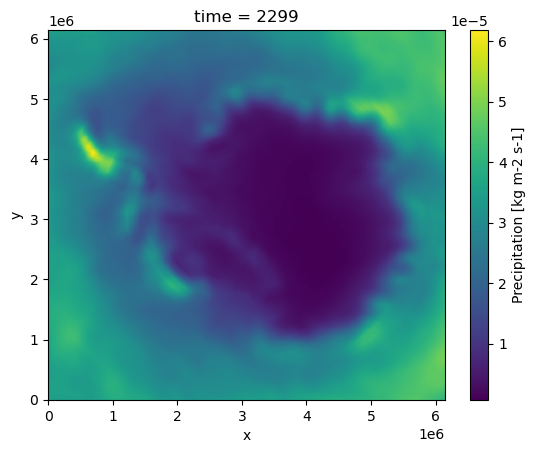

In [29]:
from pathlib import Path
prdir = Path('/Volumes/LaCie/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp534-over/r1i1p1f1/Amon/pr/bisicles-8km/v20200701')
files = sorted(prdir.glob("*.nc"))
pr = xr.open_mfdataset(files, combine='by_coords')
pr.pr.isel(time=-1).plot()

/var/folders/d9/3tqzv4xj1sx00nng1hd597500000gn/T/ipykernel_40477/623556192.py:3: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  evspsbl = xr.open_mfdataset(files, combine='by_coords')


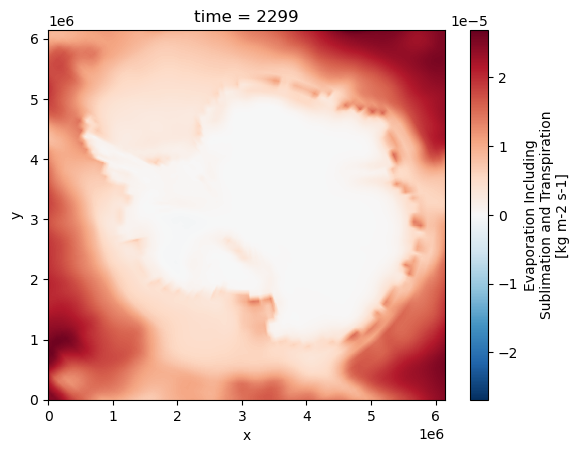

In [13]:
evspsbldir = Path('/Volumes/LaCie/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp534-over/r1i1p1f1/Amon/evspsbl/bisicles-8km/v20200701')
files = sorted(evspsbldir.glob("*.nc"))
evspsbl = xr.open_mfdataset(files, combine='by_coords')
evspsbl.evspsbl.isel(time=-1).plot()

/var/folders/d9/3tqzv4xj1sx00nng1hd597500000gn/T/ipykernel_40477/3121696838.py:3: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  mrro = xr.open_mfdataset(files, combine='by_coords')


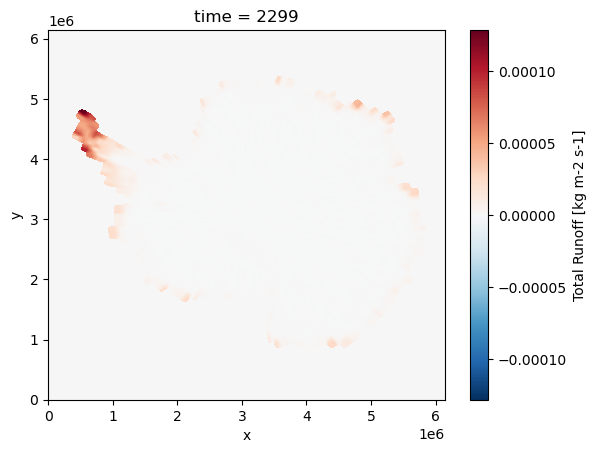

In [15]:
mrrodir = Path('/Volumes/LaCie/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp534-over/r1i1p1f1/Lmon/mrro/bisicles-8km/v20200701')
files = sorted(mrrodir.glob("*.nc"))
mrro = xr.open_mfdataset(files, combine='by_coords')
mrro.mrro.isel(time=-1).fillna(0).plot()

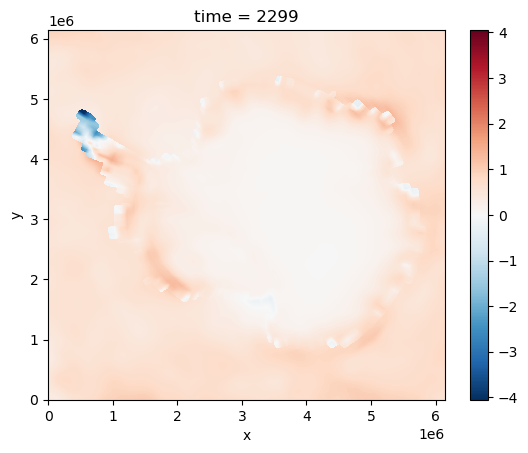

In [17]:
smb = pr.pr - evspsbl.evspsbl - mrro.mrro.fillna(0)
# Convert from kg/m2/s to m/a
smb = smb * (1 / 917) * (60 * 60 * 24 * 365.25)
smb.isel(time=-1).plot()


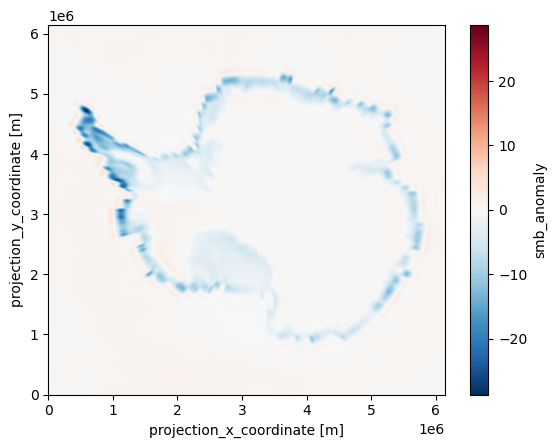

In [31]:
file = xr.open_dataset('/Users/jonniebarnsley/Downloads/smb/ssp585/CESM2-WACCM/smb_anomaly_CESM2-WACCM_ssp585_2300.nc')
file.smb_anomaly.plot()

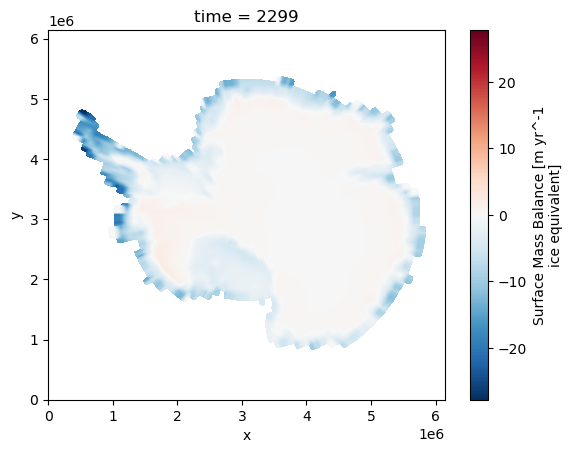

In [32]:
file = xr.open_dataset('/Volumes/LaCie/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp585/r1i1p1f1/Lmon/smb/bisicles-8km/v20200702/smb_Lmon_CESM2-WACCM_ssp585_r1i1p1f1_bisicles-8km_2015-2299.nc')
file.smb.isel(time=-1).plot()